In [308]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load the data from the Excel file
data = pd.read_excel('../Resource/ExperimentDataBase/CV-XB1.xlsx')
data.head()

,SAVI,EVI,TCART,CIrededge１,DVI,OSAVI,RDVI,TVI,MNVI,MSAVI,MTVI,CV
0,0.391183,0.381614,0.209608,0.247409,0.200236,0.469903,0.389710,13.344433,4.993982,-0.002430,0.073945,0.544679
1,0.288076,0.270190,0.136932,0.175674,0.131152,0.386633,0.313622,8.739052,5.449485,-0.155296,0.050816,0.498407
2,0.265616,0.246168,0.121953,0.175542,0.116736,0.367884,0.297037,7.775861,5.538661,-0.188704,0.045879,0.529073
3,0.392406,0.383920,0.213560,0.297059,0.203482,0.468467,0.390561,13.551821,4.951197,-0.000997,0.074597,0.672203
4,0.458369,0.455672,0.261670,0.360423,0.248851,0.521785,0.440008,16.586838,4.652733,0.096070,0.089586,0.741492


In [309]:
# Split the data into features (X) and target (y)
# X = data.drop([[]], axis=1)
X = data.drop(['TVI','MSAVI','CV'],axis=1)
y = data['CV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("X_Train:",X_train)
print("X_Test:",X_test)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_Train:         SAVI       EVI     TCART  CIrededge１       DVI     OSAVI      RDVI  \
30  0.423417  0.415890  0.195261    0.271809  0.216998  0.503588  0.415675   
31  0.520144  0.529504  0.177689    0.286802  0.290023  0.583749  0.499375   
43  0.228343  0.218039  0.052484    0.170375  0.110836  0.287842  0.237270   
65  0.271790  0.251290  0.124779    0.169101  0.118501  0.377215  0.301702   
46  0.396737  0.380054  0.201437    0.279056  0.192409  0.496179  0.402138   
24  0.472923  0.474595  0.268137    0.376139  0.262418  0.532858  0.454128   
17  0.292569  0.275333  0.137996    0.178963  0.137205  0.389324  0.317657   
56  0.293104  0.273024  0.134899    0.174125  0.128251  0.406318  0.325526   
35  0.359532  0.350585  0.213490    0.278830  0.188007  0.432304  0.361580   
18  0.332935  0.316804  0.165236    0.217991  0.159302  0.427230  0.346441   
39  0.430738  0.426158  0.220029    0.279295  0.226741  0.507539  0.424104   
55  0.299838  0.279995  0.142045    0.185267  0.133082 

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_29364\202614004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train, hist=True, kde=False, label='Train Data')
C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_29364\202614004.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test, hist=True

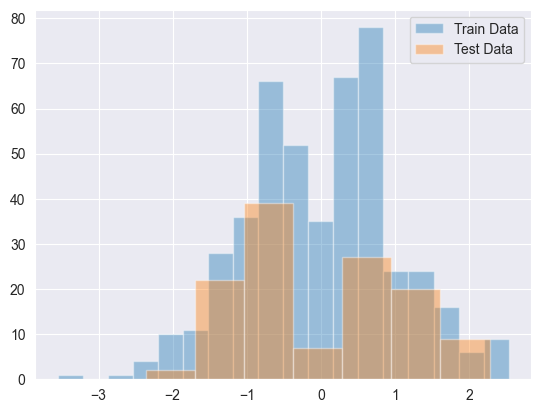

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制直方图
sns.distplot(X_train, hist=True, kde=False, label='Train Data')
sns.distplot(X_test, hist=True, kde=False, label='Test Data')

plt.legend()
plt.show()

In [316]:
# Define the XGBoost model
model = xgb.XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_P_train = model.predict(X_train)
y_pred = model.predict(X_test)


R²: 0.9999751580220472


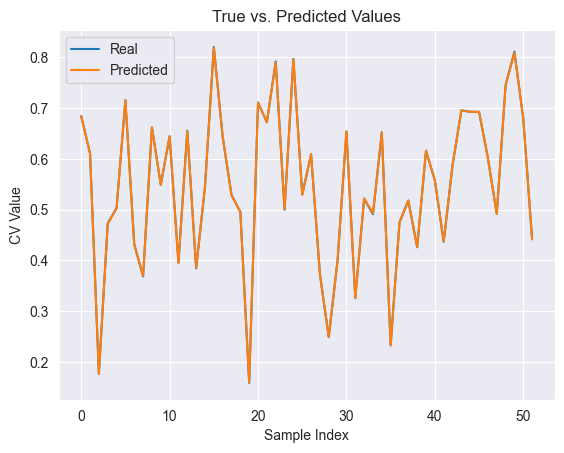

In [321]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Plot the true values and predicted values
plt.plot(y_train.values,label="Real")
plt.plot(y_P_train, label='Predicted')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('CV Value')
r2 = r2_score(y_train,y_P_train)
print("R²:",r2)
plt.legend()
plt.show()

R²: 0.7998032391672777


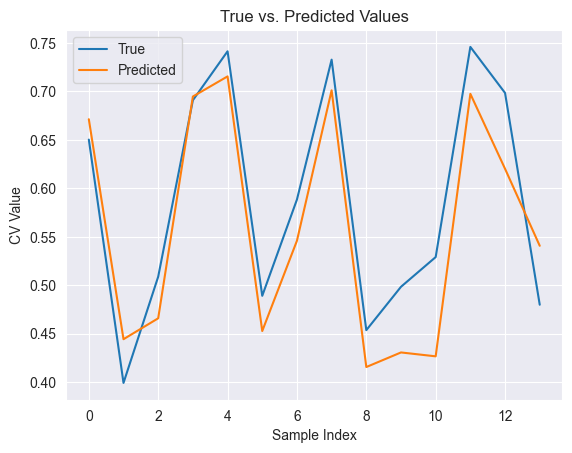

In [312]:


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Plot the true values and predicted values
plt.plot(y_test.values, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('CV Value')
r2 = r2_score(y_test,y_pred)
print("R²:",r2)
plt.legend()
plt.show()